![image](https://docs.google.com/uc?export=download&id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d)

# **Scikit-image Final Bootcamp**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jpcano1/ISIS_4825_skimage_last/blob/master/Scikit_Image_Final_Bootcamp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## **Contenido**
1. **Feature Extraction**
    - Ya segmentamos, ¿y ahora qué?
    - Preprocesamiento de contornos
        - Freeman Chain Code Ejemplo (Open CV)
        - Marching Squares (Scikit Image)
        - Skeletonization
        - Medial Axis Skeletonize
        - Contour Signature
        - Polígono de Perímetro Mínimo.
    - Boundary Features:
        - Diametro Local.
        - Longitud.
        - Ángulo.
    - Region Properties:
        - Circularidad.
        - Excentricidad.
        - Compacidad.
        - Texture Descriptor - Momentos de Orden N.
        - Histograma de Gradientes Orientados (HoG).

In [6]:
import cv2
from skimage import io
from utils import visualization as vis
from skimage.filters import threshold_otsu
from skimage.exposure import equalize_hist, rescale_intensity
from skimage.measure import (find_contours, 
                             approximate_polygon, 
                             subdivide_polygon, label, 
                             regionprops, regionprops_table)
from skimage.morphology import skeletonize, medial_axis
from skimage.feature import hog

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from skimage import color

import scipy.ndimage as ndi

In [237]:
url = "https://github.com/PacktPublishing/Python-Image-Processing-Cookbook/blob/master/Chapter%2004/images/planets.png?raw=true"

# **Preprocesamiento de Contornos**
## **Freeman Chain Codes**

In [239]:
img = vis.download_content(url)

Descargando archivos: 100%|█████████▉| 386/387 [00:00<00:00, 16288.07KB/s]


In [240]:
img_gray = color.rgb2gray(img)

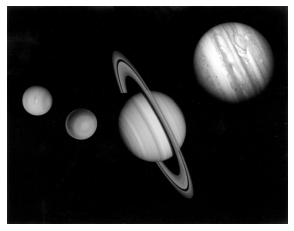

In [241]:
vis.imshow(img_gray)

In [242]:
thresh = threshold_otsu(img_gray)

In [243]:
segmented_img = (img_gray > thresh).astype("uint8")

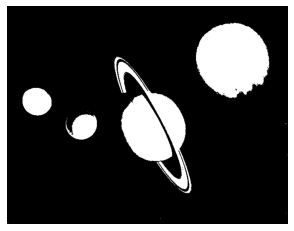

In [244]:
vis.imshow(segmented_img)

In [245]:
contours, _ = cv2.findContours(segmented_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [246]:
draw = cv2.drawContours(img_gray.copy(), contours, -1, (255, 255, 0), 3)

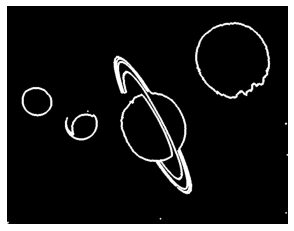

In [247]:
vis.imshow(draw)

## **Marching Squares**

In [248]:
contours = find_contours(segmented_img, 0.2)

In [251]:
contour = max(contours, key=len)

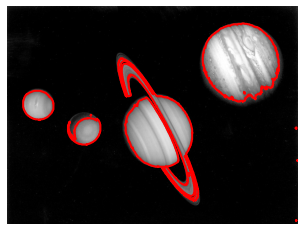

In [250]:
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], color="r", linewidth=2)

plt.ylim(500, 0)
vis.imshow(img_gray)
plt.axis("off")
plt.show()

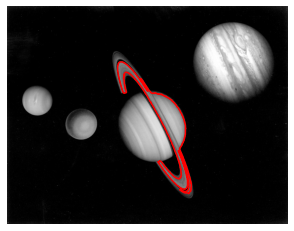

In [254]:
plt.plot(contour[..., 1], contour[..., 0], color="r")
vis.imshow(img_gray)

## **Skeletonization**

In [3]:
url_angio = "https://www.radiologyinfo.org/gallery-items/images/ICA-Angiogram.jpg"

In [4]:
img = vis.download_content(url_angio)

Descargando archivos:  95%|█████████▌| 19/20 [00:00<00:00, 4867.27KB/s]


In [5]:
img_gray = color.rgb2gray(img)

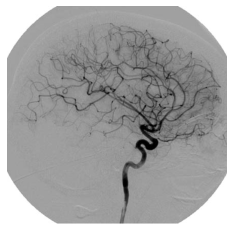

In [6]:
vis.imshow(img_gray)

In [7]:
thresh = threshold_otsu(img_gray)

In [8]:
thresh

0.775390625

In [15]:
segmented = (img_gray < 0.4).astype("uint8")

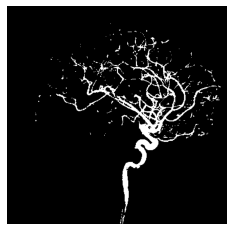

In [16]:
vis.imshow(segmented)

In [17]:
medial = medial_axis(segmented)

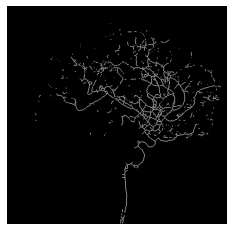

In [19]:
vis.imshow(medial)

In [20]:
skeleton = skeletonize(segmented)

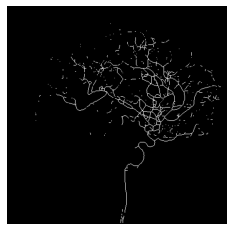

In [21]:
vis.imshow(skeleton)

In [22]:
url_tree = "https://estaticos.muyinteresante.es/media/cache/1000x460_thumb/uploads/images/test/5af18b675bafe8cd7d3c986b/arbol.jpg"

In [23]:
arbol = vis.download_content(url_tree)

Descargando archivos:  85%|████████▍ | 56/66 [00:00<00:00, 271.96KB/s]


In [24]:
arbol_gray = color.rgb2gray(arbol)

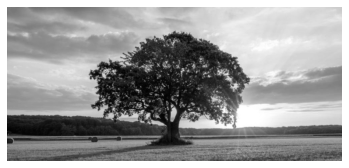

In [25]:
vis.imshow(arbol_gray)

In [26]:
thresh = threshold_otsu(arbol_gray)

In [27]:
segmented = (arbol_gray < thresh).astype("uint8")

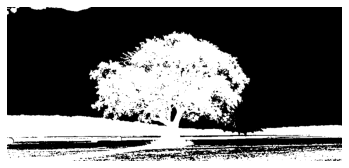

In [28]:
vis.imshow(segmented)

In [29]:
skeleton = medial_axis(segmented)

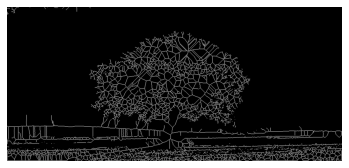

In [30]:
vis.imshow(skeleton)

In [31]:
skeleton = skeletonize(segmented)

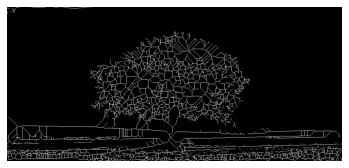

In [32]:
vis.imshow(skeleton)

## **Contour Signature**

In [35]:
leaf_url = "https://image.shutterstock.com/image-photo/green-perilla-leaf-known-shiso-260nw-416872249.jpg"

In [39]:
leaf = vis.download_content(leaf_url)
leaf_gray = color.rgb2gray(leaf)

Descargando archivos:  95%|█████████▌| 21/22 [00:00<00:00, 19362.58KB/s]


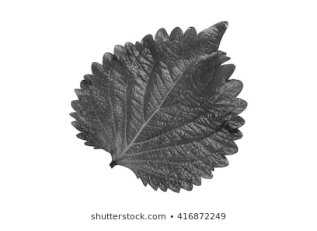

In [41]:
vis.imshow(leaf_gray)

In [43]:
thresh = threshold_otsu(leaf_gray)

In [48]:
thresh

0.6936151769301472

In [64]:
segmented = (leaf_gray < thresh).astype("uint8")
segmented = segmented[:250, :]

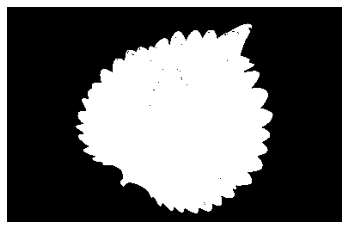

In [65]:
vis.imshow(segmented)

In [119]:
contours = find_contours(segmented, .8)

In [120]:
contour = max(contours, key=len)

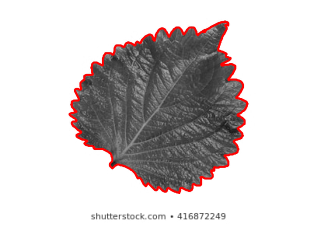

In [121]:
plt.plot(contour[..., 1], contour[..., 0], linewidth=2, color="r")
vis.imshow(leaf_gray)

In [104]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

In [122]:
cx, cy = ndi.center_of_mass(leaf_gray)

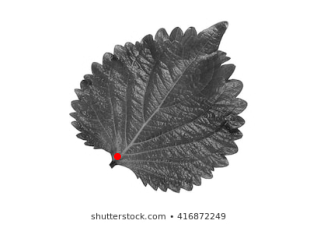

In [123]:
plt.scatter(cx, cy, color="r")
vis.imshow(leaf_gray)

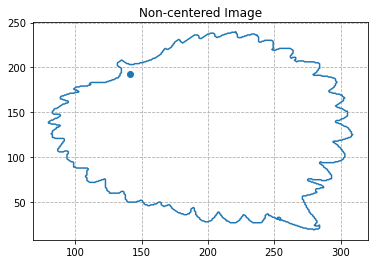

In [124]:
plt.plot(contour[..., 1], contour[..., 0])
plt.scatter(cx, cy)
plt.grid(linestyle="--")
plt.title("Non-centered Image")
plt.show()

In [125]:
contour[..., 1] -= cx
contour[..., 0] -= cy

In [126]:
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

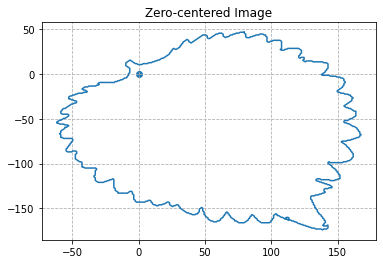

In [127]:
plt.plot(contour[..., 1], contour[..., 0])
plt.scatter(0, 0)
plt.grid(linestyle="--")
plt.title("Zero-centered Image")
plt.show()

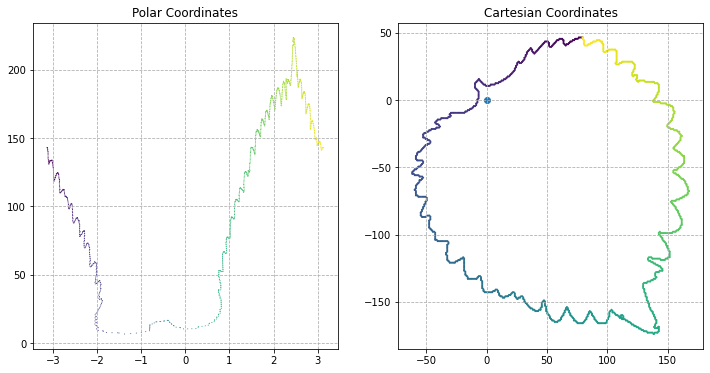

In [133]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(polar_contour[..., 1], polar_contour[..., 0], linewidth=0, s=1, c=polar_contour[..., 1])
plt.title("Polar Coordinates")
plt.grid(linestyle="--")

plt.subplot(122)
plt.scatter(contour[..., 1], contour[..., 0], s=1, c=range(len(contour)))
plt.scatter(0, 0)
plt.grid(linestyle="--")
plt.title("Cartesian Coordinates")
plt.show()

## **Polígonos de Perímetro Mínimo**

In [202]:
url_planets = "https://hipertextual.com/files/2014/02/sistema-solar-tierra.jpg"

In [203]:
planets = vis.download_content(url_planets)
planets_gray = color.rgb2gray(planets)

Descargando archivos:  97%|█████████▋| 32/33 [00:00<00:00, 5548.48KB/s]


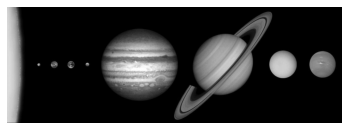

In [204]:
vis.imshow(planets_gray)

In [209]:
segmented = (planets_gray > 0.3).astype("uint8")

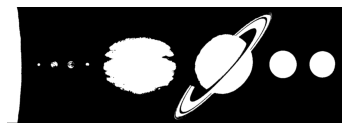

In [210]:
vis.imshow(segmented)

In [212]:
contours = find_contours(segmented, 0.8)

In [216]:
contour = max(contours, key=len)

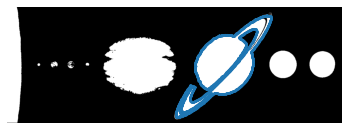

In [218]:
plt.scatter(contour[..., 1], contour[..., 0], s=1)
vis.imshow(segmented)

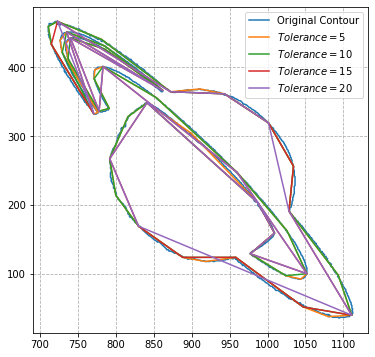

In [236]:
plt.figure(figsize=(6, 6))
plt.plot(contour[... ,1], contour[..., 0], label=f"Original Contour")
for i in range(5, 21, 5):
    coords = approximate_polygon(contour, tolerance=i)
    plt.plot(coords[..., 1], coords[..., 0], label=f"$Tolerance={i}$")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

# **Boundary Features**
$$diameter(B)=max_{i, j}[D(p_i, p_j)]$$

$$length_m=[(x_2 - x_1)^2 + (y_2 - y_1)^2]^{\frac{1}{2}}$$

$$angle_m=tan^{-1}\bigg[\frac{y_2 - y_1}{x_2 - x_1}\bigg]$$

# **Region Properties**
$$circularity=\frac{4\pi A}{p^2}$$

$$compactness=\frac{p^2}{A}$$

$$eccentricity=\frac{c}{a}=\frac{\sqrt{a^2 - b^2}}{a}=\sqrt{1-(b/a)^2}$$

In [31]:
url_elipse = "https://p4.wallpaperbetter.com/wallpaper/5/875/596/nature-hole-texture-black-wallpaper-preview.jpg"

In [34]:
elipse = vis.download_content(url_elipse)
elipse_gray = color.rgb2gray(elipse)

Descargando archivos:  99%|█████████▉| 109/110 [00:00<00:00, 471.98KB/s]


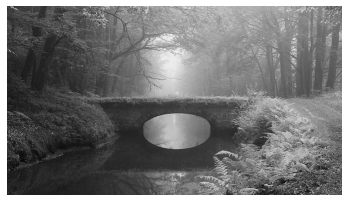

In [35]:
vis.imshow(elipse_gray)

In [36]:
thresh = threshold_otsu(mirror_gray)

In [37]:
thresh

0.6863330078125

In [109]:
segmented = (elipse_gray > .3).astype("uint8")
segmented = segmented[210:330, 250:480]

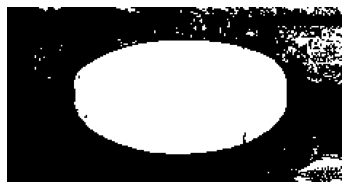

In [110]:
vis.imshow(segmented)

In [81]:
contours = find_contours(segmented, 0.8)

In [84]:
contour = max(contours, key=len)

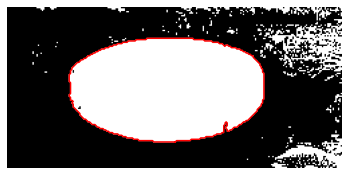

In [89]:
plt.plot(contour[..., 1], contour[..., 0], color="r", linewidth=1.5)
vis.imshow(segmented)

In [91]:
label_elipse = label(segmented)

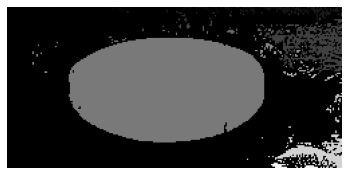

In [94]:
regions = regions

In [96]:
regions = regionprops(label_elipse)

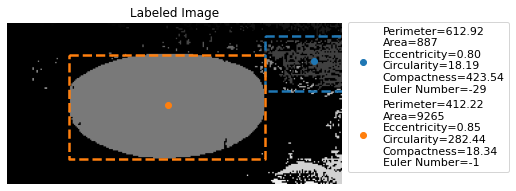

In [211]:
for props in regions:
    y0, x0 = props["centroid"]
    if props["area"] > 500:
        circ = 4*np.pi*props["area"]/props["perimeter"]
        comp = props["perimeter"]**2 / props["area"]
        label_v = f"Perimeter={props['perimeter']:.2f}\n"
        label_v += f"Area={props['area']}\n"
        label_v += f"Eccentricity={props['eccentricity']:.2f}\n"
        label_v += f"Circularity={circ:.2f}\n"
        label_v += f"Compactness={comp:.2f}\n"
        label_v += f"Euler Number={props['euler_number']}"
        plt.scatter(x0, y0, label=label_v)
        
        minr, minc, maxr, maxc = props["bbox"]
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        plt.plot(bx, by, "--", linewidth=2.5)
vis.imshow(label_elipse, "Labeled Image")
plt.legend(bbox_to_anchor=(1, 1.04), fontsize=11)
plt.show()

In [186]:
props_table = regionprops_table(label_elipse, properties=["area",
                                                          "eccentricity", 
                                                          "perimeter", 
                                                          "euler_number"])

In [201]:
props_df = pd.DataFrame(props_table)

In [202]:
props_df = props_df.query("area > 500")

In [205]:
props_df.loc[:, "circularity"] = props_df["area"] * 4*np.pi / props_df["perimeter"]
props_df.loc[:, "compactness"] = props_df["perimeter"]**2 / props_df["area"]

In [206]:
props_df

,area,eccentricity,perimeter,euler_number,circularity,compactness
41,887,0.800126,612.924928,-29,18.18554,423.536603
78,9265,0.849999,412.220346,-1,282.43978,18.340595


In [208]:
props_df.describe()

,area,eccentricity,perimeter,euler_number,circularity,compactness
count,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,5076.000000,0.825063,512.572637,-15.00000,150.312660,220.938599
std,5924.140613,0.035266,141.919571,19.79899,186.855965,286.516845
min,887.000000,0.800126,412.220346,-29.00000,18.185540,18.340595
25%,2981.500000,0.812594,462.396491,-22.00000,84.249100,119.639597
50%,5076.000000,0.825063,512.572637,-15.00000,150.312660,220.938599
75%,7170.500000,0.837531,562.748782,-8.00000,216.376220,322.237601
max,9265.000000,0.849999,612.924928,-1.00000,282.439780,423.536603


## **Histograma De gradientes Orientados**

In [40]:
url_bowie = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQD15A8V2TPDP3V615gaeVei6--F2OWSgbEzA&usqp=CAU"

In [42]:
bowie = vis.download_content(url_bowie)
bowie_gray = color.rgb2gray(bowie)

Descargando archivos:  83%|████████▎ | 5/6 [00:00<00:00, 4395.62KB/s]


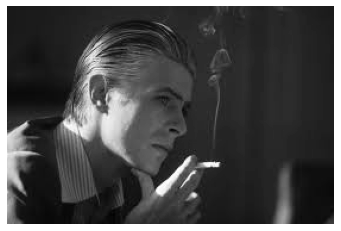

In [43]:
vis.imshow(bowie_gray)

In [55]:
_, hog_image = hog(bowie_gray, orientations=8, 
                   pixels_per_cell=(16, 16), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)

In [56]:
hog_rescaled = vis.scale(hog_image, 0., 1., dtype="float")

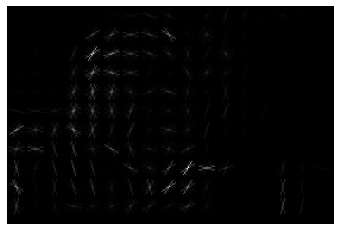

In [57]:
vis.imshow(hog_rescaled)

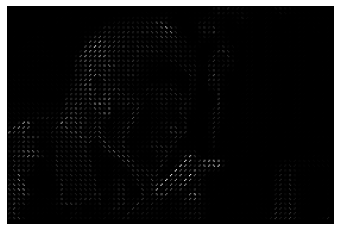

In [58]:
_, hog_image = hog(bowie_gray, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)
hog_rescaled = vis.scale(hog_image, 0., 1., dtype="float")
vis.imshow(hog_rescaled)

In [62]:
equalized_bowie = equalize_hist(bowie_gray)

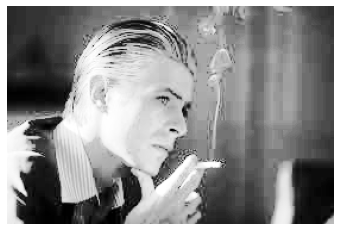

In [63]:
vis.imshow(equalized_bowie)

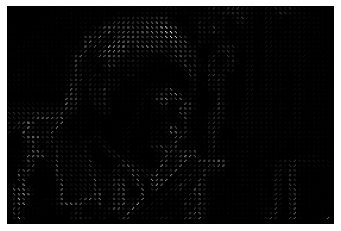

In [65]:
_, hog_image = hog(equalized_bowie, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)
hog_rescaled = vis.scale(hog_image, 0., 1., dtype="float")
vis.imshow(hog_rescaled)

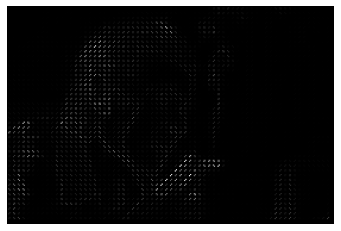

In [66]:
_, hog_image = hog(bowie, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=True)
hog_rescaled = vis.scale(hog_image, 0., 1., dtype="float")
vis.imshow(hog_rescaled)

In [72]:
equalized_bowie_color = np.zeros_like(bowie, dtype="float")
for i in range(3):
    equalized_bowie_color[..., i] = equalize_hist(bowie[..., i])

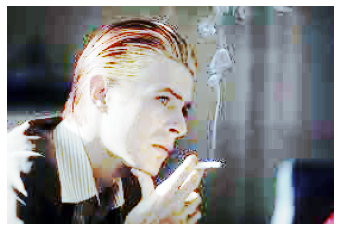

In [73]:
vis.imshow(equalized_bowie_color)

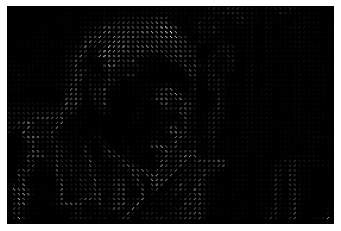

In [74]:
_, hog_image = hog(equalized_bowie_color, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=True)
hog_rescaled = vis.scale(hog_image, 0., 1., dtype="float")
vis.imshow(hog_rescaled)

In [ ]:
url_monitor = 'https://drive.google.com/u/0/uc?id=1kQnVSScmxKLzcJ1kQ_t59vUbp7SYbBzz&export=download'